In [1]:
# Step-1 EDA - Exploratory Data Analysis 
# Step-2 Feature Engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\ml_code_work\tf2_keras_deep_learning_bootcamp\my_try_jupyter\DATA\kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isnull().sum() # gives count>0 if any column has null values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


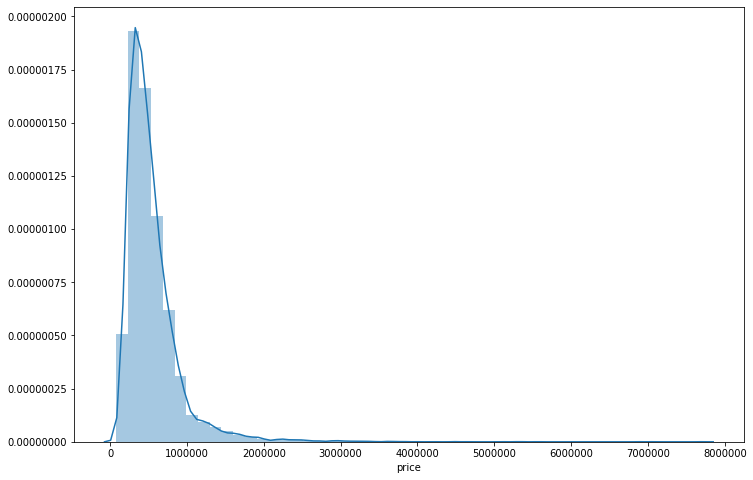

In [7]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

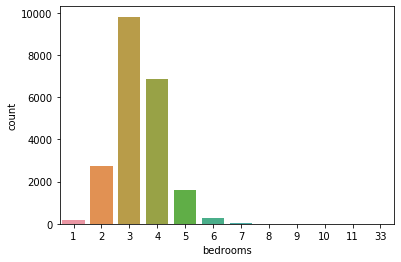

In [8]:
sns.countplot(df['bedrooms'])

In [9]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

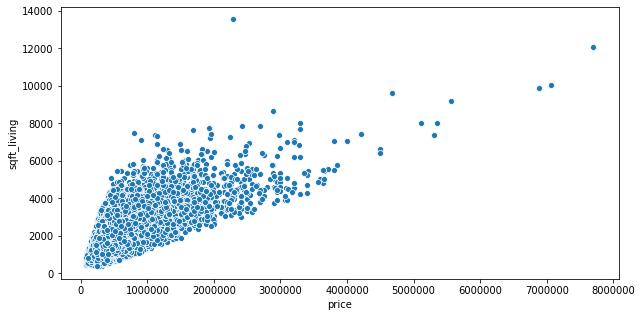

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

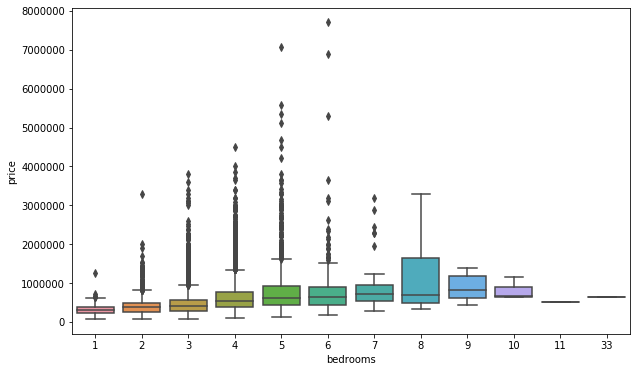

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df)

In [12]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

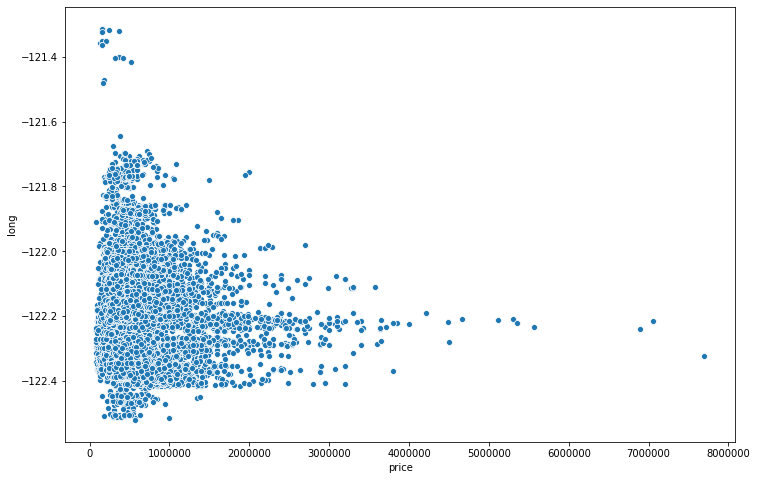

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=df)

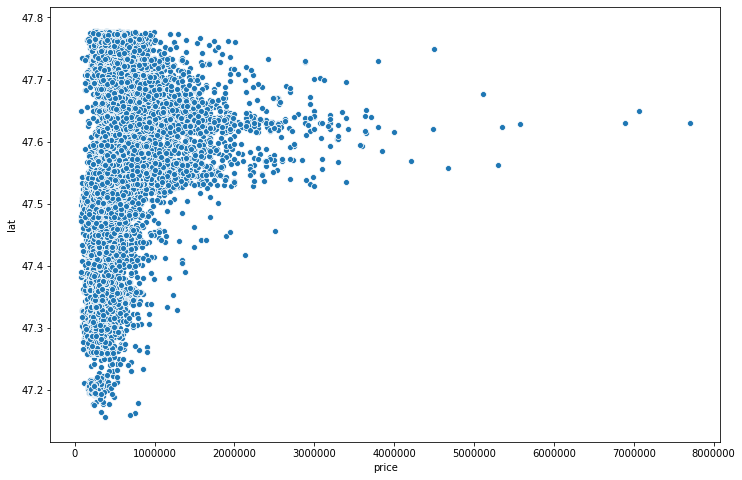

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='lat', data=df)

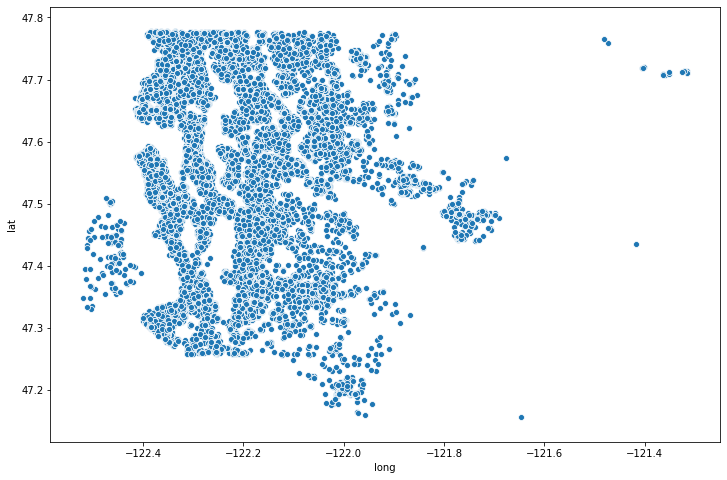

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df)

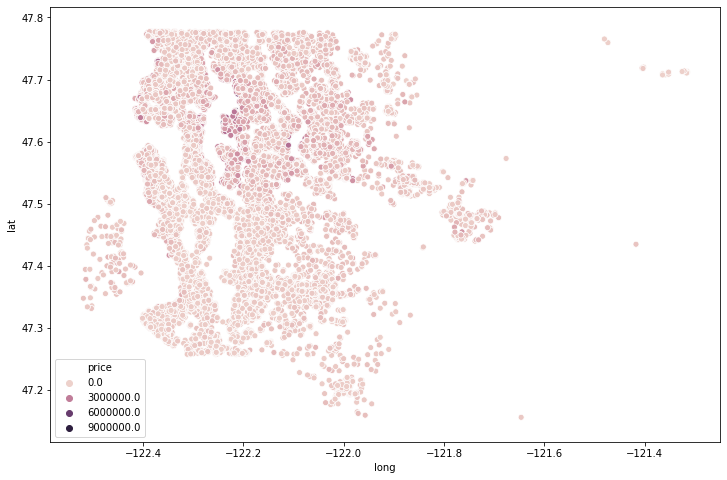

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [17]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [18]:
len(df)

21597

In [19]:
len(df) *0.01

215.97

In [20]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

In [21]:
len(non_top_1_perc)

21381

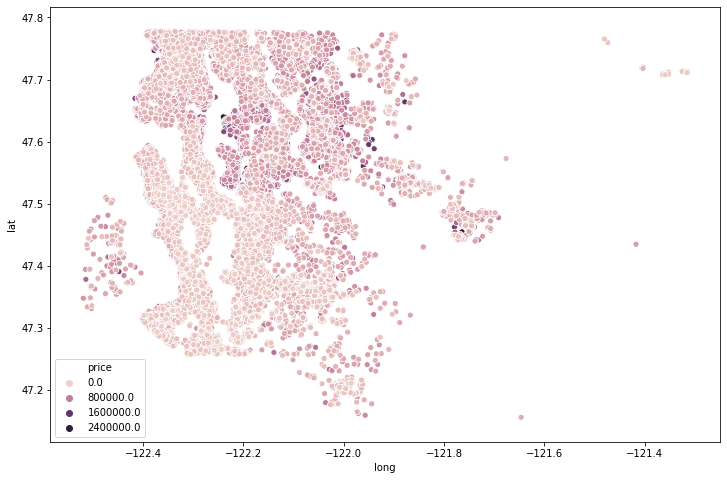

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price')

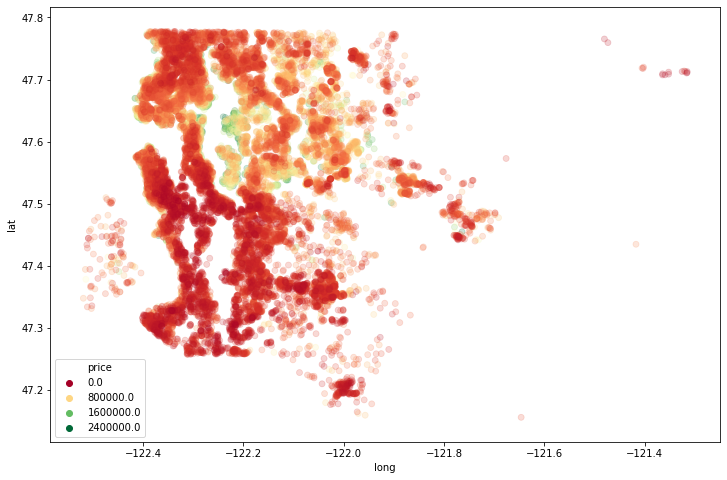

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc,
                edgecolor=None, alpha=0.2,palette='RdYlGn', hue='price')

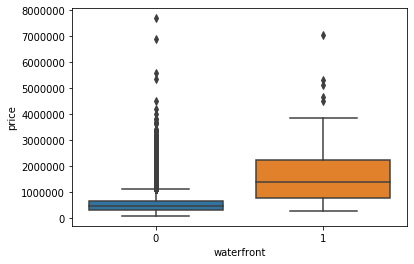

In [24]:
sns.boxplot(x='waterfront', y='price', data=df)

In [25]:
# Feature Engineering ond data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
df = df.drop('id', axis=1)

In [27]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [29]:
df['date'] = pd.to_datetime(df['date'])

In [30]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:

df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [32]:
def year_extraction(date):
    return date.year

In [33]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [34]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


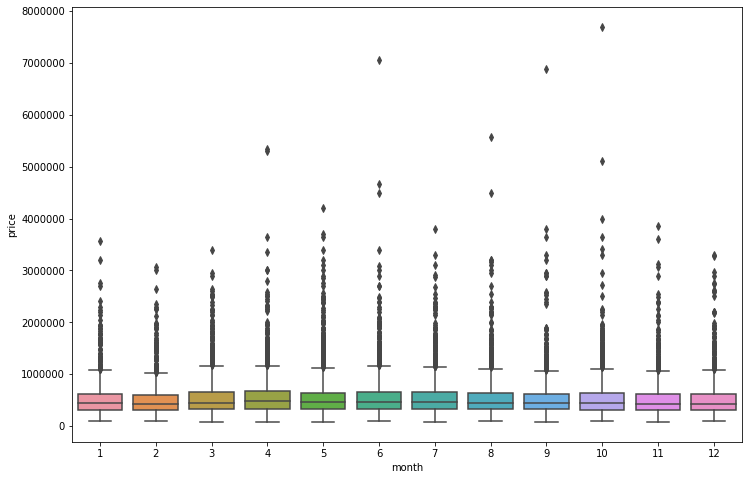

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month', y='price', data=df)

In [36]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

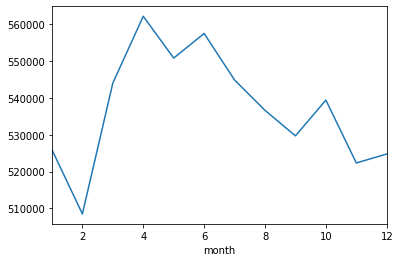

In [37]:
df.groupby('month').mean()['price'].plot()

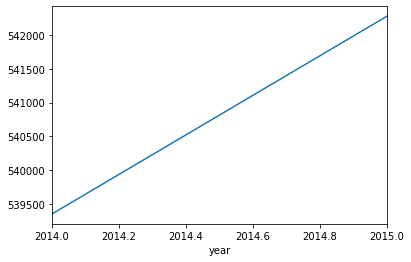

In [38]:
df.groupby('year').mean()['price'].plot()

In [39]:
df = df.drop('date', axis=1)

In [40]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [41]:
# domain express - for zipcode
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [42]:
df = df.drop('zipcode', axis=1)

In [43]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [44]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [45]:
# the more renovated will have more cost
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [46]:
# part-2 
# Training model create
# Step-3:- 
X = df.drop('price', axis=1).values
y = df['price'].values

In [47]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 5.650e+03, 2.014e+03,
        1.000e+01],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 7.639e+03, 2.014e+03,
        1.200e+01],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 8.062e+03, 2.015e+03,
        2.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.007e+03, 2.014e+03,
        6.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 1.287e+03, 2.015e+03,
        1.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 1.357e+03, 2.014e+03,
        1.000e+01]])

In [48]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train = scaler.fit_transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [54]:
X_train.shape # -19 means - 19 Neuron needed

(15117, 19)

In [55]:
X_test.shape

(6480, 19)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [57]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [58]:
# Train the Model 
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 75us/sample - loss: 430217473518.2864 - val_loss: 418791410569.1654
Epoch 2/400
15117/15117 [==============================] - 0s 17us/sample - loss: 427779316862.0610 - val_loss: 410694855338.6667
Epoch 3/400
15117/15117 [==============================] - 0s 16us/sample - loss: 398352800864.7980 - val_loss: 346448508670.1036
Epoch 4/400
15117/15117 [==============================] - 0s 19us/sample - loss: 278642929728.2159 - val_loss: 179984064147.9111
Epoch 5/400
15117/15117 [==============================] - 0s 17us/sample - loss: 130318919119.5332 - val_loss: 97110755656.6914
Epoch 6/400
15117/15117 [==============================] - 0s 18us/sample - loss: 98242429437.9340 - val_loss: 94171924879.4864
Epoch 7/400
15117/15117 [==============================] - 0s 17us/sample - loss: 96340884131.4864 - val_loss: 92442964453.4519
Epoch 8/400
15117/15117 [=====================

15117/15117 [==============================] - 0s 16us/sample - loss: 37704113811.4324 - val_loss: 36446908163.1605
Epoch 65/400
15117/15117 [==============================] - 0s 17us/sample - loss: 37545784443.6902 - val_loss: 36234476263.3481
Epoch 66/400
15117/15117 [==============================] - 0s 16us/sample - loss: 37336415102.6198 - val_loss: 36059123105.1852
Epoch 67/400
15117/15117 [==============================] - 0s 16us/sample - loss: 37188695596.8766 - val_loss: 35913292842.9827
Epoch 68/400
15117/15117 [==============================] - 0s 16us/sample - loss: 37010453324.1548 - val_loss: 35700895698.4889
Epoch 69/400
15117/15117 [==============================] - 0s 17us/sample - loss: 36850260567.4840 - val_loss: 35553230564.8198
Epoch 70/400
15117/15117 [==============================] - 0s 17us/sample - loss: 36723044773.4678 - val_loss: 35383346345.4025
Epoch 71/400
15117/15117 [==============================] - 0s 16us/sample - loss: 36534485407.7777 - val_loss

15117/15117 [==============================] - 0s 16us/sample - loss: 32816513039.8508 - val_loss: 31320401055.2889
Epoch 128/400
15117/15117 [==============================] - 0s 17us/sample - loss: 32794756391.0003 - val_loss: 31294958301.2346
Epoch 129/400
15117/15117 [==============================] - 0s 16us/sample - loss: 32766082826.7873 - val_loss: 31247068890.7062
Epoch 130/400
15117/15117 [==============================] - 0s 16us/sample - loss: 32742341343.2993 - val_loss: 31268908873.9556
Epoch 131/400
15117/15117 [==============================] - 0s 17us/sample - loss: 32715075754.3957 - val_loss: 31175342459.2593
Epoch 132/400
15117/15117 [==============================] - 0s 16us/sample - loss: 32661179594.4698 - val_loss: 31147650601.7185
Epoch 133/400
15117/15117 [==============================] - 0s 16us/sample - loss: 32628803738.7143 - val_loss: 31102262497.0272
Epoch 134/400
15117/15117 [==============================] - 0s 16us/sample - loss: 32621242795.5642 - v

Epoch 190/400
15117/15117 [==============================] - 0s 17us/sample - loss: 31390360343.9963 - val_loss: 29662341787.4963
Epoch 191/400
15117/15117 [==============================] - 0s 16us/sample - loss: 31372316408.4980 - val_loss: 29643024657.0667
Epoch 192/400
15117/15117 [==============================] - 0s 16us/sample - loss: 31346545649.0298 - val_loss: 29649772023.1506
Epoch 193/400
15117/15117 [==============================] - 0s 16us/sample - loss: 31328216952.1170 - val_loss: 29641388997.8469
Epoch 194/400
15117/15117 [==============================] - 0s 16us/sample - loss: 31302430320.7504 - val_loss: 29546039725.8272
Epoch 195/400
15117/15117 [==============================] - 0s 16us/sample - loss: 31294585691.9378 - val_loss: 29542869462.2815
Epoch 196/400
15117/15117 [==============================] - 0s 17us/sample - loss: 31311172553.8771 - val_loss: 29495724674.2123
Epoch 197/400
15117/15117 [==============================] - 0s 16us/sample - loss: 312775

15117/15117 [==============================] - 0s 17us/sample - loss: 30429867475.7330 - val_loss: 28578879624.5333
Epoch 254/400
15117/15117 [==============================] - 0s 16us/sample - loss: 30433817676.2056 - val_loss: 28496930831.1704
Epoch 255/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30408322437.1566 - val_loss: 28479642055.1111
Epoch 256/400
15117/15117 [==============================] - 0s 16us/sample - loss: 30395805301.4921 - val_loss: 28434303921.6198
Epoch 257/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30393207223.8926 - val_loss: 28552716839.1901
Epoch 258/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30381752072.7552 - val_loss: 28384199864.5728
Epoch 259/400
15117/15117 [==============================] - 0s 16us/sample - loss: 30346937090.7265 - val_loss: 28407904458.2716
Epoch 260/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30374570122.5248 - v

15117/15117 [==============================] - 0s 17us/sample - loss: 29689650781.1402 - val_loss: 27547603692.4049
Epoch 317/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29674117489.9866 - val_loss: 27519619759.7235
Epoch 318/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29657036780.6268 - val_loss: 27494015587.8716
Epoch 319/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29715841696.8446 - val_loss: 27480678541.5901
Epoch 320/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29637592614.9157 - val_loss: 27484020063.4469
Epoch 321/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29593939124.7258 - val_loss: 27456301445.3728
Epoch 322/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29659826899.3097 - val_loss: 27424573237.7284
Epoch 323/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29713853975.2681 - v

15117/15117 [==============================] - 0s 16us/sample - loss: 29038075716.2294 - val_loss: 26639627736.8099
Epoch 380/400
15117/15117 [==============================] - 0s 17us/sample - loss: 28959477229.0671 - val_loss: 26655050961.8568
Epoch 381/400
15117/15117 [==============================] - 0s 17us/sample - loss: 28923821214.3044 - val_loss: 26680897293.2741
Epoch 382/400
15117/15117 [==============================] - 0s 17us/sample - loss: 28883970147.0334 - val_loss: 26696964434.8049
Epoch 383/400
15117/15117 [==============================] - 0s 16us/sample - loss: 28888587134.2134 - val_loss: 26635282244.8988
Epoch 384/400
15117/15117 [==============================] - 0s 16us/sample - loss: 28857341935.2009 - val_loss: 26556314044.9975
Epoch 385/400
15117/15117 [==============================] - 0s 16us/sample - loss: 28871615296.0974 - val_loss: 26527900871.7432
Epoch 386/400
15117/15117 [==============================] - 0s 16us/sample - loss: 28837165435.1990 - v

In [59]:
# Model Evaluation 
losses = pd.DataFrame(model.history.history)

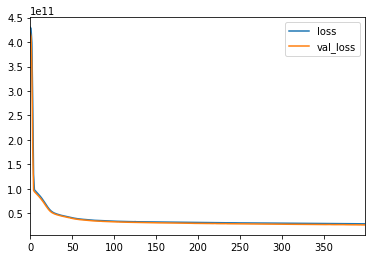

In [60]:
losses.plot() # no overfitting here

In [61]:

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [62]:
predictions = model.predict(X_test)

In [63]:
predictions

array([[405540.  ],
       [582054.06],
       [583392.44],
       ...,
       [394794.53],
       [558577.5 ],
       [662917.4 ]], dtype=float32)

In [64]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.        ,
        0.63636364],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.        ,
        0.81818182],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.        ,
        0.90909091],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 0.        ,
        1.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 1.        ,
        0.09090909],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.        ,
        0.45454545]])

In [65]:
np.sqrt(mean_squared_error(y_test, predictions))

162219.08757887065

In [66]:
mean_absolute_error(y_test, predictions)

99460.41963614004

In [67]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [68]:
5.402966e+05

540296.6

In [69]:
explained_variance_score(y_test, predictions)

0.8020349192163682

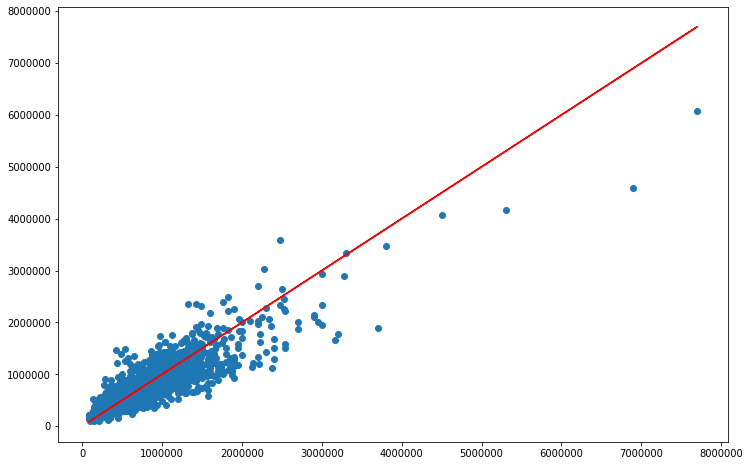

In [70]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [74]:
#errors = y_test.values.reshape(6480, 1) - predictions
errors = y_test.values.reshape(6480, 1) - predictions


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [76]:
single_house = df.drop('price',axis=1).iloc[0]

In [77]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [78]:
scaler.transform(single_house.values.reshape(-1, 19))

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [79]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [80]:
model.predict(single_house)

array([[282072.4]], dtype=float32)

In [81]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
year               2014.0000
month                10.0000
Name: 0, dtype: float64

In [ ]:
df.head(1)

In [82]:
# Early stopping 
# Dropout layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv(r'C:\ml_code_work\tf2_keras_deep_learning_bootcamp\my_try_jupyter\DATA\cancer_classification.csv')

In [84]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [86]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


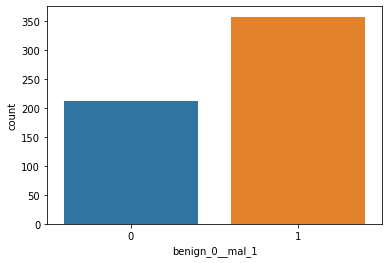

In [87]:
sns.countplot(x='benign_0__mal_1', data=df)

In [88]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

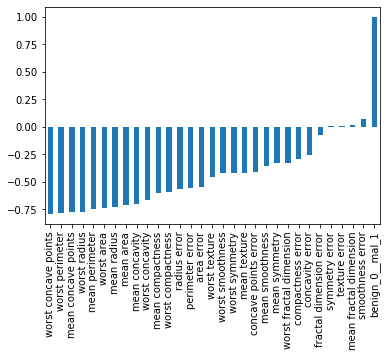

In [89]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

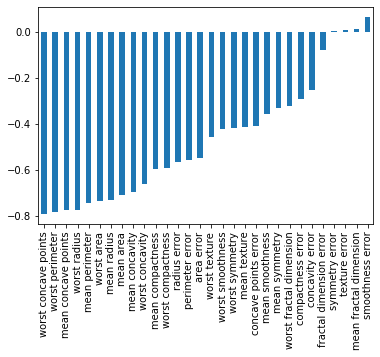

In [90]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

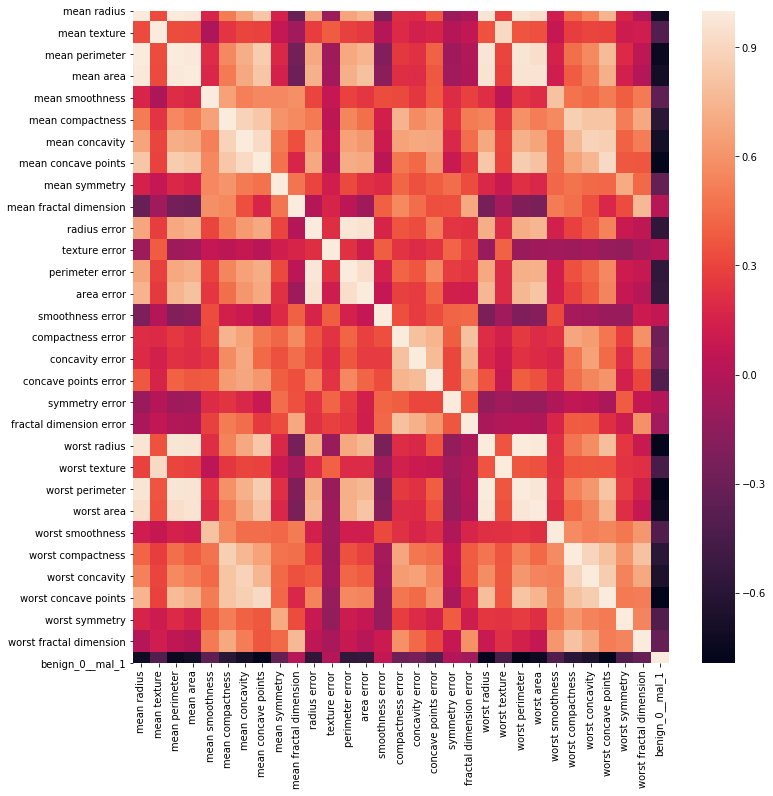

In [91]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [92]:
X =df.drop('benign_0__mal_1',axis=1).values
y =df['benign_0__mal_1'].values

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=101)

In [95]:
from sklearn.preprocessing import minmax_scale

In [96]:
scaler = MinMaxScaler()

In [97]:
X_train = scaler.fit_transform(X_train)

In [98]:
X_test = scaler.transform(X_test)

In [99]:
# Overfitting - starting from 48
from tensorflow.keras.models import Sequential

In [100]:
from tensorflow.keras.layers import Dense, Dropout

In [101]:
X_train.shape

(426, 30)

In [103]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

# Binary classification
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')
